<h2>GLOBAL WARMING

<h3>Through this project I intend to find a correlation between the emmision of CO2 into the atmosphere, global surface temperature and Arctic ice area and Arctic ice extent. And hopefully show that higher atmospheric CO2 levels have resulted in the rise in global surface temperature and a reduction in the surface area and extent of Arctic ice - resulting in global warming.

<h4>Importing all the required libraries

In [2]:
import requests as req
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import mean_squared_error

<h4> Data scrapped from climate.nasa.gov<br>
     Data obtained is open source and can be used by anyone for research purposes<br>
     Data source: NASA's Goddard Institute for Space Studies (GISS). Credit: NASA/GISS<br>
     BeatifulSoup library - used to scrape data using the URL mentioned below

In [3]:
#Extracting the html code using beautifulsoup
original_url = "https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt"
r = req.get(original_url)
soup = BeautifulSoup(r.text, "html.parser")
st=str(soup)
st=st.split()

#deleting initial string values from string
del st[0:9]

#Creating emptly lists
new_c1=[]
new_c2=[]
new_c3=[]

#for loop to convert extracted data to list
for i in range(0,len(st)):
    if i%3==0:
        new_c1.append(int(st[i+0]))
        new_c2.append(float(st[i+1]))
        new_c3.append(st[i+2])

#Merging the lists to make dataframe-1
df1 = pd.DataFrame(list(zip(new_c1, new_c2,new_c3)),columns=["Year","No_Smoothing","Lowess"])

#Command to drop the column
df1=df1.drop(['Lowess'], axis=1)

#Use of lambda function to change the name of the column No_smoothing
df1_list = ['No_Smoothing']   
df1=df1.rename(columns=lambda x: 'Global surface temperature change' if x in df1_list else x)

<h4> The data frame below represents change in global surface temperature relative to 1951-1980 average temperatures. The third column("lowess") was dropped from the table as it was representative of the values obtained through lowess smoothing(a popular tool used in regression analysis) to fit a smooth line through a scatter plot. Since, I will not be implementing this methodology, the column was dropped before plotting the graph.

In [4]:
#Print dataframe - 1
print(df1)

     Year  Global surface temperature change
0    1880                              -0.16
1    1881                              -0.07
2    1882                              -0.10
3    1883                              -0.16
4    1884                              -0.28
..    ...                                ...
136  2016                               1.01
137  2017                               0.92
138  2018                               0.85
139  2019                               0.98
140  2020                               1.02

[141 rows x 2 columns]


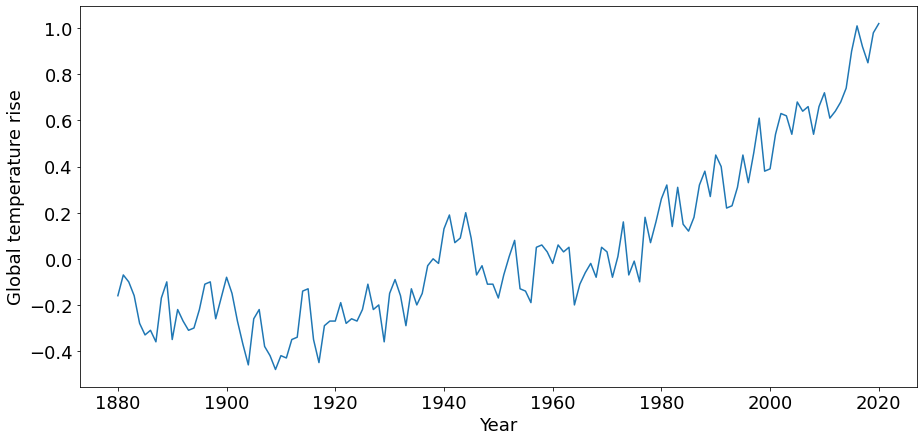

In [5]:
#Plotting the dataframe-1 using matplotlib library 
f = plt.figure()

#Setting graph width and height
f.set_figwidth(15)
f.set_figheight(7)
plt.rcParams.update({'font.size': 18})

#plot the graph for dataframe-1
plt.plot(df1['Year'],df1["Global surface temperature change"])
plt.xlabel("Year")
plt.ylabel("Global temperature rise")
plt.show()

<h4>This graph is a representation of the rising global surface temperature relative to the years 1951-1980. From the graph it is clear that there has been a huge spike in temperature in the last 20 years.

<h4>The code below extracts data from a text file which was dowloaded from climate.nasa.gov(Atmospheric Carbon Dioxide levels) - The data obtained is made freely available to the public and the scientific community in the belief that their wide dissemination will lead to greater understanding and new scientific insights. 
<h4>Credit: use of NOAA GML data

In [6]:
#opening/reading sample.txt which was downloaded from https://climate.nasa.gov/(Carbon Dioxide-Direct measurements)
file = open("sample.txt")
line = file.read()
file.close()

#using split function to make an array of words
new_data = line.split()

#deleting the initial array of words upto 445
del new_data[0:445]
new_data_column_1=[]
new_data_column_2=[]
new_data_column_3=[]
new_data_column_4=[]
new_data_column_5=[]
new_data_column_6=[]
new_data_column_7=[]
new_data_column_8=[]

#for loop to extract the data into 8 different lists
for i in range(0,len(new_data)):
    if i%8==0:
        new_data_column_1.append(new_data[i+0])
        new_data_column_2.append(new_data[i+1])
        new_data_column_3.append(new_data[i+2])
        new_data_column_4.append(new_data[i+3])
        new_data_column_5.append(new_data[i+4])
        new_data_column_6.append(new_data[i+5])
        new_data_column_7.append(new_data[i+6])
        new_data_column_8.append(new_data[i+7])
        
#merging the lists to get dataframe-2
df3 = pd.DataFrame(list(zip(new_data_column_1,new_data_column_2,new_data_column_3,new_data_column_4,new_data_column_5,
                           new_data_column_6,new_data_column_7,new_data_column_8)))

<h4>Dataframe-3 consists of 8 columnns, of which much of the data is redundant or not required, and thus cannot be used for this research. Due to this reason, only the relevant data from dataframe-3 will be extracted and the remaining data will be discarded. I will be using the data from column-0 and column-3 which represents the years and monthly average atmospheric CO2 levels respectively. The data from columns -0 and -3, will be further cleaned using the functions below dataframe-3 to obtain the desired resuls which can then be used to plot a graph to represent the data.

In [7]:
#print dataframe-3
print(df3)

        0  1          2       3       4   5      6      7
0    1958  3  1958.2027  315.70  314.43  -1  -9.99  -0.99
1    1958  4  1958.2877  317.45  315.16  -1  -9.99  -0.99
2    1958  5  1958.3699  317.51  314.71  -1  -9.99  -0.99
3    1958  6  1958.4548  317.24  315.14  -1  -9.99  -0.99
4    1958  7  1958.5370  315.86  315.18  -1  -9.99  -0.99
..    ... ..        ...     ...     ...  ..    ...    ...
754  2021  1  2021.0417  415.52  415.25  29   0.44   0.16
755  2021  2  2021.1250  416.75  415.94  28   1.02   0.37
756  2021  3  2021.2083  417.64  416.15  28   0.86   0.31
757  2021  4  2021.2917  419.05  416.23  24   1.12   0.44
758  2021  5  2021.3750  419.13  415.67  28   0.90   0.32

[759 rows x 8 columns]


<h4>Function to delete unwanted rows and columns from df3 - to plot graph representing the yearly atmospheric CO2 levels.

In [8]:
#self-made module extrafunctions used to make code cleaner-(can be found in folder)
#Used to obtain yearly mean CO2 values from dataframe-3
#Used to delete a few unwanted rows from dataframe3
#Years-1958 and 2021 will be deleted as the data for atmospheric CO2 levels is incomplete(Done in extrafunctions)
import extrafunctions

def with_year(user_function,df):
    mean_list = user_function(df)
    list_date=[]
    
    #for loop to add years into list_date 
    for i in range(0,62):
        list_date.append(1959+i)
    df3_mean_value = pd.DataFrame(list(zip(list_date, mean_list)),columns =['year', 'co2_mean'])
    return df3_mean_value

In [9]:
#Print updated dataframe with just yearly CO2 values from 1959-2020
ddv = with_year(extrafunctions.collect_mean,df3)
print(ddv)

    year  co2_mean
0   1959    315.98
1   1960    316.91
2   1961    317.64
3   1962    318.45
4   1963    318.99
..   ...       ...
57  2016    404.41
58  2017    406.76
59  2018    408.71
60  2019    411.65
61  2020    414.24

[62 rows x 2 columns]


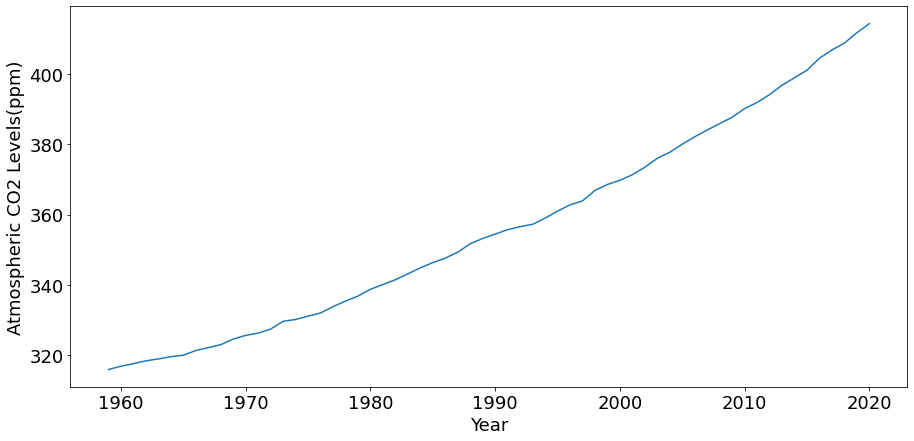

In [10]:
#Plotting the graph
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)
plt.plot(ddv['year'],ddv['co2_mean'])
plt.xlabel("Year")
plt.ylabel("Atmospheric CO2 Levels(ppm)")#ppm - parts per million
plt.show()

<h4>Graph showing a rise in atmospheric CO2 levels over the years

<h4>The code below extracts data from an excel file which was dowloaded from climate.nasa.gov(Artic Ice Minimum) - The data obtained is made freely available to the public and the scientific community. The data is a representation of the reduction in the artic ice area and extent.
<h4>Credit: Satellite observations: NSIDC/NASA

In [11]:
df4 = pd.read_csv('data4.csv')
df4.columns = df4.columns.str.replace(' ', '')
df4 = df4.drop(['mo', 'data-type', 'region'], axis=1)

In [12]:
#Print dataframe-4
print(df4)

    year  extent  area
0   1979    7.05  4.58
1   1980    7.67  4.87
2   1981    7.14  4.44
3   1982    7.30  4.43
4   1983    7.39  4.70
5   1984    6.81  4.11
6   1985    6.70  4.23
7   1986    7.41  4.72
8   1987    7.28  5.64
9   1988    7.37  5.36
10  1989    7.01  4.86
11  1990    6.14  4.55
12  1991    6.47  4.51
13  1992    7.47  5.43
14  1993    6.40  4.58
15  1994    7.14  5.13
16  1995    6.08  4.43
17  1996    7.58  5.62
18  1997    6.69  4.89
19  1998    6.54  4.30
20  1999    6.12  4.29
21  2000    6.25  4.35
22  2001    6.73  4.59
23  2002    5.83  4.03
24  2003    6.12  4.05
25  2004    5.98  4.39
26  2005    5.50  4.07
27  2006    5.86  4.01
28  2007    4.27  2.82
29  2008    4.69  3.26
30  2009    5.26  3.76
31  2010    4.87  3.34
32  2011    4.56  3.21
33  2012    3.57  2.41
34  2013    5.21  3.78
35  2014    5.22  3.74
36  2015    4.62  3.42
37  2016    4.53  2.91
38  2017    4.82  3.35
39  2018    4.79  3.35
40  2019    4.36  3.17
41  2020    3.92  2.78


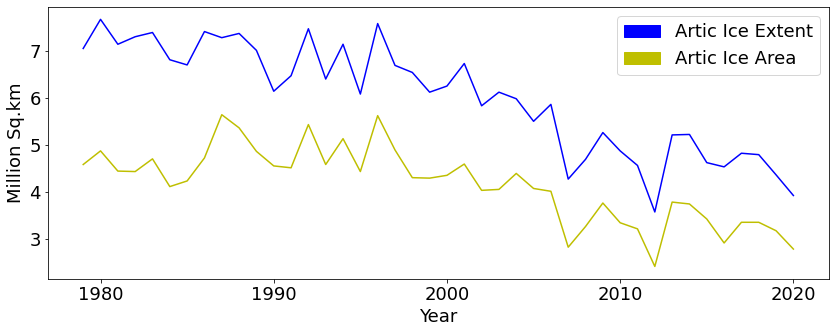

In [13]:
#Ploting the Artic Ice Extent and Area graph
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(5)
plt.plot(df4['year'],df4['extent'],color='b')
plt.plot(df4['year'],df4['area'],color='y')
b_patch = mpatches.Patch(color='b', label='Artic Ice Extent')
o_patch = mpatches.Patch(color='y', label='Artic Ice Area')
plt.legend(handles=[b_patch,o_patch])
plt.xlabel("Year")
plt.ylabel("Million Sq.km")
plt.show()

<h4>A small wordcloud implementation of global warming - climate change...

In [14]:
#word cloud string
word_cloud_words='gREeNhOuSE gAsEs STOP cLimAte ChANgE ICE MeLT ArTiC CO2 EmMisSiONS GLobAL WarMiNg SeA LEvelS RISinG UrGEncY FirEs TeMpErATuRE BaLAncE cARBoN'

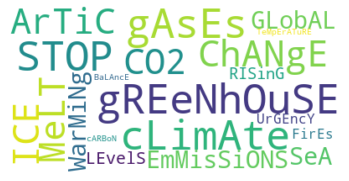

In [15]:
#building WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",collocations = False)
wordcloud = wordcloud.generate(word_cloud_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h4> Inorder to draw a clear correlation between the global temepertature rise, atmospheric CO2 levels, Artic Ice Area and Artic Ice extent - I'm going to merge all three dataframes df1, ddv and df4. To do this using the data I have at hand, I've dropped all the data for the years before 1979, and also the dropped the year column from dataframes df1 and df4, so that the they become identical dataframes that can be merged. 

In [16]:
#Function to merge the dataframes
def merge_three_dataFrames(df1,ddv,df4):
    final_df1=df1
    final_ddv=ddv
    final_df4=df4
    
    #droping all the years before 1979
    final_df1 = final_df1.drop([i for i in range(0,df1[df1['Year']==1979].index.values[0])])
    final_df1 = final_df1.reset_index(drop=True)
    #dropping year column
    final_df1 = final_df1.drop(['Year'], axis=1)
    
    #droping all the years before 1979
    final_ddv = final_ddv.drop([i for i in range(0,ddv[ddv['year']==1979].index.values[0])])
    final_ddv = final_ddv.reset_index(drop=True)
    #droping year column and storing new dataframe in final_df4
    final_df4 = final_df4.drop(['year'], axis=1)
    result = pd.concat([final_ddv,final_df1,final_df4], axis=1)
    return result

In [17]:
#merging all three dataframes
merge_data = merge_three_dataFrames(df1,ddv,df4)

#printing merged dataframe with just the fisrt 5 rows
merge_data.head()

,year,co2_mean,Global surface temperature change,extent,area
0,1979,336.84,0.16,7.05,4.58
1,1980,338.76,0.26,7.67,4.87
2,1981,340.12,0.32,7.14,4.44
3,1982,341.48,0.14,7.30,4.43
4,1983,343.15,0.31,7.39,4.70


<h4>Plotting the graph of merge_data(merged dataframe) before standardising the values. We cannot understand anything form this graph.

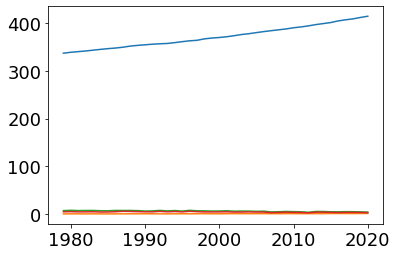

In [18]:
#Before StandardScaler
plt.plot(merge_data['year'],merge_data['co2_mean'])
plt.plot(merge_data['year'],merge_data['Global surface temperature change'])
plt.plot(merge_data['year'],merge_data['extent'])
plt.plot(merge_data['year'],merge_data['area'])
plt.show()

<h4>Standardising the values from the merged dataframe and printing the scaled dataframe(scaled_final_data), so that we can plot a graph that gives a clear correlation between global temperature, atmosheric CO2 levels, Arctic Ice levels(Area and extent).

In [19]:
#standard scaling
scaler = StandardScaler()
scaler.fit(merge_data.drop('year',axis=1)) 
scaled_final_data = scaler.transform(merge_data.drop('year',axis=1))

#final standard scaled data frame
scaled_final_data = pd.DataFrame(scaled_final_data)
scaled_final_data.columns = merge_data.columns[1:5].values.tolist()
scaled_final_data = pd.concat([merge_data['year'],scaled_final_data], axis=1)
scaled_final_data.head()

,year,co2_mean,Global surface temperature change,extent,area
0,1979,-1.550887,-1.396864,0.909151,0.544768
1,1980,-1.465113,-0.997760,1.454894,0.915453
2,1981,-1.404356,-0.758298,0.988372,0.365816
3,1982,-1.343600,-1.476685,1.129209,0.353034
4,1983,-1.268994,-0.798208,1.208429,0.698155


In [20]:
#Changing font size again
plt.rcParams.update({'font.size': 10})

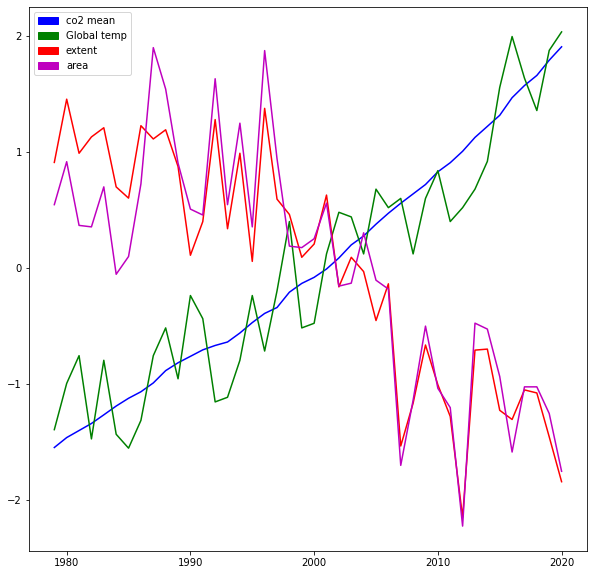

In [21]:
#Plotting graph after StandardScaler
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(scaled_final_data['year'],scaled_final_data['co2_mean'],color='b')
plt.plot(scaled_final_data['year'],scaled_final_data['Global surface temperature change'],color='g')
plt.plot(scaled_final_data['year'],scaled_final_data['extent'],color='r')
plt.plot(scaled_final_data['year'],scaled_final_data['area'],color='m')
cc1 = mpatches.Patch(color='b', label='co2 mean')
cc2 = mpatches.Patch(color='g', label='Global temp')
cc3 = mpatches.Patch(color='r', label='extent')
cc4 = mpatches.Patch(color='m', label='area')
plt.legend(handles=[cc1,cc2,cc3,cc4])
plt.show()

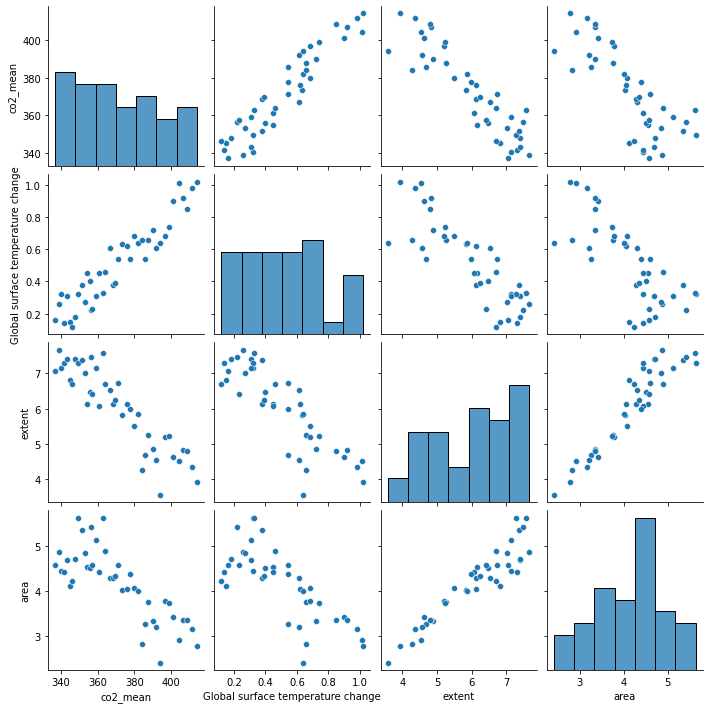

In [22]:
#Using Seaborn library - We can see global surface temperature has negative corelation with extent & area, 
#and positive corelation with CO2 mean.
sns.pairplot(merge_data.drop('year',axis=1))
plt.show()

<h4> Heat map to show the corelation between atmospheric CO2 levels, Global surface temperature change and Arctic Ice extent and Arctic ice area.

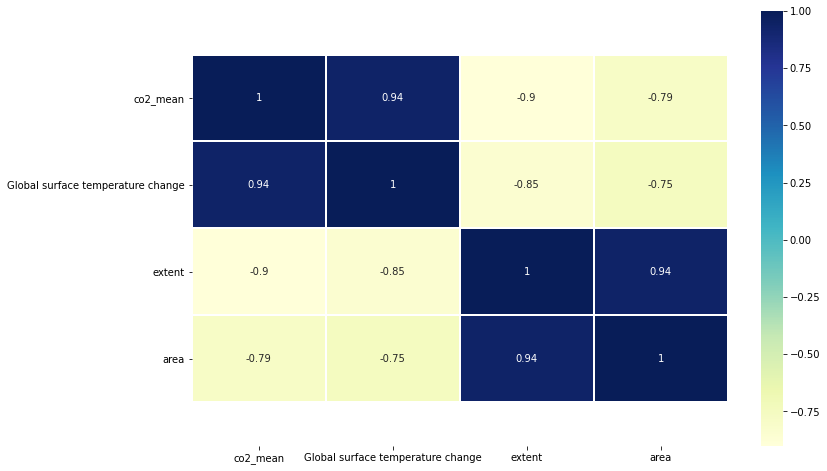

In [23]:
%matplotlib inline
plt.figure(figsize = (12,8))
ax = sns.heatmap(scaled_final_data.drop('year',axis=1).corr(), cmap ="YlGnBu", linewidths = 0.30, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<h4>Building a small linear regression model - 25% of data being passed as test size and predicting accuracy of data through this model. Model score 81.4%

In [24]:
#dividing data into training and testing
x=scaled_final_data.drop(['year','Global surface temperature change'],axis=1)
y=scaled_final_data.drop(['year','area','extent','co2_mean'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

#building Model
LR = LinearRegression()
LR.fit(x_train,y_train)

#predicting y parameter
y_pred = LR.predict(x_test)

#Model score, mean squared error & root mean squared error
print('Model score = ',LR.score(x_test, y_test))
print('mean_sqrd_error is = ',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is = ',np.sqrt(mean_squared_error(y_test,y_pred)))

Model score =  0.8141222333743223
mean_sqrd_error is =  0.13637977614590707
root_mean_squared error of is =  0.3692963256599056


<h4> Plotting regression line graphs to show correlation between global surface temperature change and - Arctic ice extent - Arctic ice area - Atmospheric CO2 Levels.

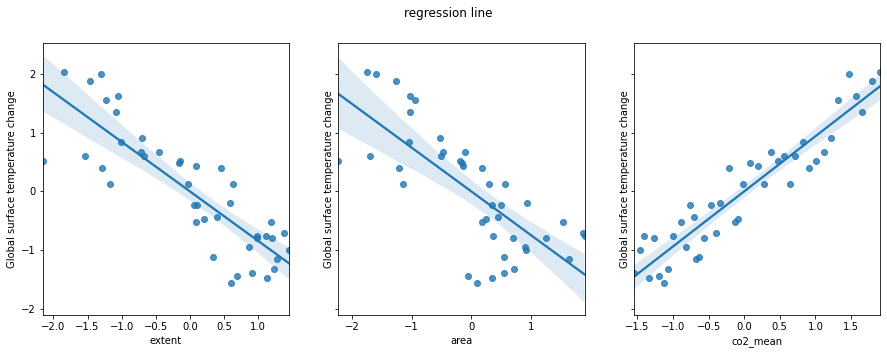

In [25]:
#Plot regression line - Using seaborn
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('regression line')
sns.regplot(y=scaled_final_data['Global surface temperature change'], x=scaled_final_data['extent']  ,ax=axes[0])
sns.regplot(y=scaled_final_data['Global surface temperature change'], x=scaled_final_data['area']    ,ax=axes[1])
sns.regplot(y=scaled_final_data['Global surface temperature change'], x=scaled_final_data['co2_mean'],ax=axes[2])
plt.show()

<h2>CONCLUSION

<h4> The above data analysis shows a clear correlation between the increase in atmospheric CO2 levels and the increase in global surface temperature. It also shows that as a result of this temperature rise and climate change - the ice in the Arctic region has been melting steadily through the years 1979-2020 at an alarming pace with the highest decline in ice being shown in the year 2020. This data suggests that Global warming is happening now and is a real danger to society. If it continues at this pace, it would result in higher global surface temperatures and higher sea levels - with more ice melting.

<h2> THANK YOU!